# **Cyclic Tensile Test Analysis Colab Notebook**

## Introduction

This Google Colab notebook is designed to process cyclic tensile test data from <b><font color='red'>Instron-generated CSV files</font></b>, providing key mechanical properties and insights into material behavior under cyclic loading. The notebook automatically identifies individual loading-unloading cycles, calculates important statistics for each cycle, and generates stress-strain plots for visual analysis.

---

### Author Information

This notebook was created by <b><font color='cyan'>**Logan Hessefort**</font></b> ([LinkedIn](https://www.linkedin.com/in/logan-hessefort/)) at the <font color='Gold'>Center  for Sustainable Macromolecular, Materials and Manufacturing at Arizona State University </font>, supported by NSF EFRI award #213218.


---





## How to Use This Notebook

1. **Run All Cells**: Click on `Runtime` > `Run all` to set up the environment and import necessary libraries.

2. **Upload Your Data**:
   - When prompted, upload your CSV file containing the cyclic tensile test data.
   - Ensure that your data meets the input requirements specified below.

3. **Select Parameters**:
   - **Integration Method**: Choose between the **Shoelace Method (default)** or the **Trapezoidal Rule (np.trapz)** for hysteresis energy calculation.
   - **Color Scale**: Select your preferred color scale for the stress-strain plots:
     - Grayscale
     - Maroon scale
     - Gold scale

4. **View and Download Results**:
   - **Stress-Strain Plots**: The notebook will display plots of the stress-strain curves for each identified cycle.
   - **Cycle Statistics**: Calculated statistics for each cycle will be displayed in a table.

---

## Input Data Requirements

Your CSV file should be directly generated by the Instron instrument upon exporting the data and should contain the following columns with exact column names:

| Time | Displacement | Force | Tensile strain | Tensile stress |
|:----:|:-----------:|:-----:|:--------------:|:--------------:|
| (s) | (mm) | (kN) | (%) | (MPa) |
| 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0013 |
| 0.2500 | 0.0231 | 0.0007 | 0.0922 | 0.3952 |
| 0.5000 | 0.0657 | 0.0011 | 0.2629 | 0.6989 |
| 0.7500 | 0.1070 | 0.0012 | 0.4200 | 0.7349 |

**Note**:

- The data should be properly formatted, with numeric values and consistent units.
- Ensure there are no missing values or non-numeric entries in these columns.
-Data table 1 should be blank and data table 2 should contain the data.

---

## Output

The notebook will generate:

- **Stress-Strain Plots**: Visual representations of each loading-unloading cycle, customized based on your selected color scale.

- **Cycle Statistics CSV**: A file containing calculated statistics for each cycle, including:

  - **Cycle Number**
  - **Signal-to-Noise**
  - **Hysteresis Energy**
  - **Elastic (Young's) Modulus**
  - **Stress Range**
  - **Strain Range**

---

# Key Mechanical Properties and Calculations

Here's the updated section:

# 1. Hysteresis Energy
**Definition**: The energy dissipated in the material during one complete loading-unloading cycle, represented by the area enclosed within the hysteresis loop on a stress-strain graph.

###**Calculation Methods**:

### a. Shoelace Method (Default)
Use when you have complete, high-quality data sets as it provides more accurate results for cyclic loading-unloading curves with distinct transitions or irregular shapes.

The hysteresis energy (E_hyst) is calculated using the **Shoelace Formula** for the area of a closed polygon:

```
E_hyst = 1/2 |Σ(σᵢ × εᵢ₊₁ - σᵢ₊₁ × εᵢ)|
```

Where:
* σᵢ = Adjusted stress at point i
* εᵢ = Adjusted strain at point i
* n = Total number of data points in the cycle
* Indices wrap around: σₙ₊₁ = σ₁, εₙ₊₁ = ε₁

### b. Trapezoidal Rule (np.trapz)
Use when you have large gaps in your data or prefer traditional numerical integration methods that are more commonly found in literature.


```
E_hyst = ∫(ε_min to ε_max) σ_adjusted dε
```
* Computed using NumPy's `np.trapz` function.

**Adjustment for Initial Offsets**:
* Stress Adjustment: σ_adjusted = σ_original - σ_initial
* Strain Adjustment: ε_adjusted = ε_original - ε_initial

This ensures that calculations are not affected by measurement offsets or initial non-zero values.

## 2. Elastic (Young's) modulus

**Definition**: A measure of the material's stiffness, representing the slope of the stress-strain curve in the elastic region.

**Calculation**:
- Peak Young's Modulus = max(dσ/dε)

Where:
- dσ/dε = First derivative of stress with respect to strain
- Calculated after the loading starts

<b><font color='pink'>Note: If any of the the cycles in your data have a signal-to-noise ratio of < 13 dB, you need to treat these calculations with  caution and independently verify their accuracy.</font></b>

## 3. Stress Range

**Definition**: The difference between the maximum and minimum stress values in a cycle, indicating the amplitude of stress the material experiences.

**Calculation**:

```
Stress Range = σ_max - σ_min
```

Where:
- σ_max = Maximum stress in the cycle
- σ_min = Minimum stress in the cycle

## 4. Strain Range

**Definition**: The difference between the maximum and minimum strain values in a cycle, reflecting the total deformation experienced.

**Calculation**:

```
Strain Range = ε_max - ε_min
```

Where:
- ε_max = Maximum strain in the original cycle data
- ε_min = Starting strain after the loading start is detected

## 5. Signal-to-Noise Ratio (SNR) Calculation
   The script employs a specialized method to calculate signal-to-noise ratio using a sliding window approach:

   * Window Processing

      - Uses a 60-point sliding window for variance calculations
      - Implemented using numpy stride tricks for efficient computation
      - Overlapping windows provide detailed temporal analysis

   * Signal-Noise Separation:
      - Original stress data is treated as the raw signal
      - Smoothed version (60-point rolling mean) represents the true signal
      - Noise is calculated as the difference between raw and smoothed signals

SNR Computation:
    
    
      SNR = 20 * log₁₀(signal_variance / noise_variance)
      
     
Where:
* signal_variance = variance of the original signal within each window
* noise_variance = variance of the (raw signal - smoothed signal)
      
Interpretation:
* Results are expressed in decibels (dB)
* Higher positive dB values indicate cleaner signals
* Lower dB values indicate noisier data
* Values below 13 dB trigger automated data smoothing
* First cycle always uses raw data (SNR = ∞)

---

# Notes on Data Processing

- **Data Preprocessing**:
  - Negative stress and strain values due to measurement errors are corrected by applying offsets, ensuring all values start from zero.

- **Cycle Identification**:
  - The notebook automatically segments the data into individual cycles based on displacement thresholds.

- **Loading Start Detection**:
  - Uses the first derivative method to accurately identify the point where significant loading begins in each cycle.

- **Smoothing Details**:
  - Smoothing uses a 60-point rolling mean to reduce noise in the "Adjusted Stress" data when the SNR is below 13 dB. By averaging neighboring points, it creates a cleaner signal that improves the accuracy of detecting the start of loading cycle. This smoothing is only used for the detection of the loading cycle and does not effect subsiquent calculations.

---

# Interpretation of Results

- **Hysteresis Energy**:
  - Higher values indicate greater energy dissipation, which could be due to material viscoelasticity, internal friction, or damage mechanisms.

- **Elastic Modulus**:
  - Changes in the elastic modulus over cycles can indicate material degradation, hardening, or softening behavior.

- **Stress and Strain Ranges**:
  - Provide insights into the loading conditions and material deformation characteristics during cyclic loading.




---

**Disclaimer**: Ensure that the input is accurate and formatted correctly. Esure any calculations are accurate independently, the author takes no responsiblility for any mistakes arising from the usage of this notebook.

Please upload your CSV file


Saving 10mmmin_cyclic_100%_20-80_PPD_1.csv to 10mmmin_cyclic_100%_20-80_PPD_1.csv


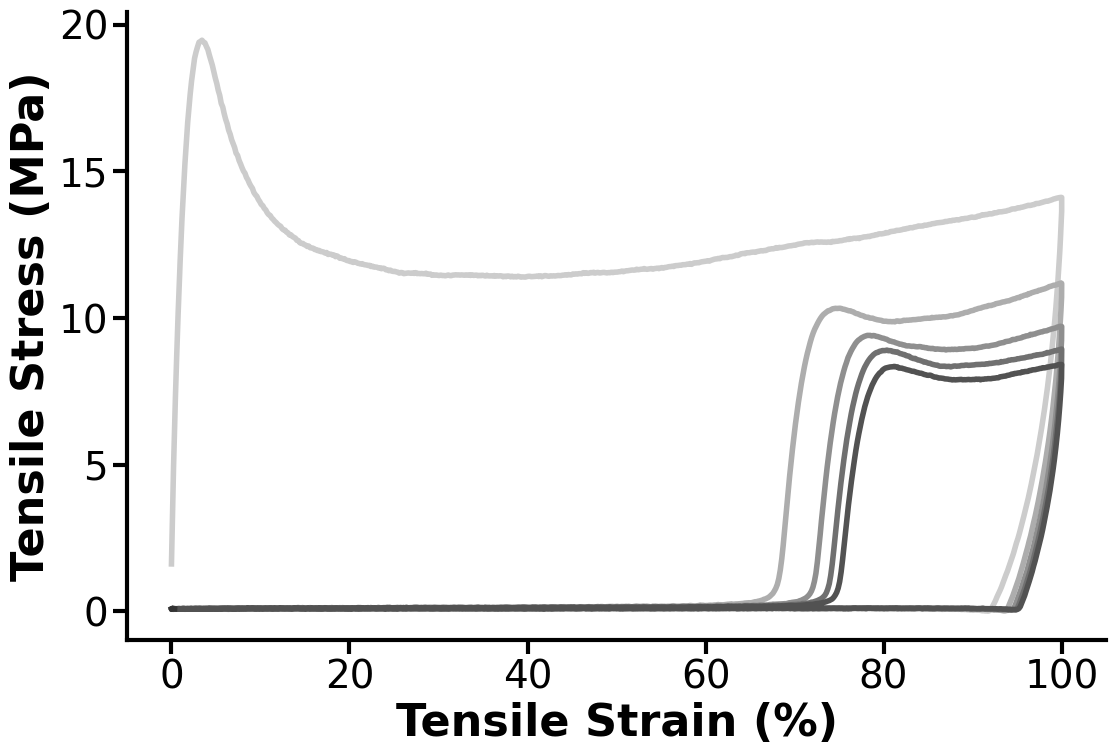

Cycle 2 SNR: 14.86 dB
Cycle 3 SNR: 14.02 dB
Cycle 4 SNR: 13.61 dB
Cycle 5 SNR: 13.24 dB

Cycle Statistics:
   Cycle   SNR (dB)  Hysteresis_Energy  Elastic(Youngs)_Modulus (MPa)  \
0      1        inf        1221.048355                     173.224379   
1      2  14.862708         303.276133                      34.782409   
2      3  14.021861         237.264187                      25.191242   
3      4  13.607267         210.590233                      23.183082   
4      5  13.241821         189.332185                      21.641115   

   Stress_Range (MPa)  Strain_Range (%)  
0             19.4766           99.5591  
1             11.1852           32.4435  
2              9.6902           28.4424  
3              8.8955           26.6115  
4              8.3656           25.6101  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import StringIO

integration_method = "Shoelace Method (default)"  #@param ["Shoelace Method (default)", "Trapezoidal Rule (np.trapz)"]
color_scale_option = "Grayscale"  #@param ["Grayscale", "Maroon scale", "Gold scale"]

print("Please upload your CSV file")
uploaded = files.upload()

def get_integration_method(selection):
    if selection == "Shoelace Method (default)":
        return 'shoelace'
    elif selection == "Trapezoidal Rule (np.trapz)":
        return 'trapz'
    else:
        raise ValueError("Invalid integration method selection.")

def get_color_scale(option):
    if option == "Grayscale":
        return lambda n: [str(x) for x in np.linspace(0.8, 0.2, n)]
    elif option == "Maroon scale":
        base_color = np.array([140/255, 29/255, 64/255])
        return lambda n: [
            tuple(base_color * (1 - 0.5 * i/(n-1))) if n > 1 else tuple(base_color)
            for i in range(n)
        ]
    elif option == "Gold scale":
        base_color = np.array([255/255, 198/255, 43/255])
        return lambda n: [
            tuple(base_color * (1 - 0.5 * i/(n-1))) if n > 1 else tuple(base_color)
            for i in range(n)
        ]
    else:
        raise ValueError("Invalid color scale selection.")

def map_columns(df):
    # Minimal necessary addition: map columns by keywords to handle different orderings
    required = {
        'Time': ['time'],
        'Displacement': ['displacement'],
        'Force': ['force'],
        'Tensile strain (Displacement)': ['strain', 'displacement'],
        'Tensile stress': ['stress']
    }

    col_map = {}
    for target_col, keywords in required.items():
        found_col = None
        for col in df.columns:
            lc = col.lower()
            if all(k in lc for k in keywords):
                found_col = col
                break
        if found_col is None:
            raise ValueError(f"Could not find required column for {target_col}")
        col_map[found_col] = target_col

    return df.rename(columns=col_map)

def process_cyclic_data(filename):
    with open(filename, 'r') as file:
        content = file.read()

    tables = content.split('Results Table 2')
    if len(tables) < 2:
        print("Error: 'Results Table 2' not found in the file.")
        return None

    lines = tables[1].strip().split('\n')
    data_lines = []
    header = None

    for line in lines:
        line = line.strip()
        if not line:
            continue
        if line.startswith('1,Time'):
            header = line
            continue
        elif header and line.startswith(',('):
            continue
        elif header and ',' in line:
            cleaned_line = line.replace('"', '')
            data_lines.append(cleaned_line)

    if header and data_lines:
        full_content = header + '\n' + '\n'.join(data_lines)
        df = pd.read_csv(StringIO(full_content))

        unnamed_cols = [col for col in df.columns if 'Unnamed' in col or not col.strip()]
        if unnamed_cols:
            df = df.drop(unnamed_cols, axis=1)

        # Ensure all data columns are numeric
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Minimal necessary addition: map columns after loading
        df = map_columns(df)
        return df
    return None

def preprocess_data(df):
    min_stress = df['Tensile stress'].min()
    min_strain = df['Tensile strain (Displacement)'].min()

    stress_offset = -min_stress if min_stress < 0 else 0
    strain_offset = -min_strain if min_strain < 0 else 0

    df['Tensile stress'] = df['Tensile stress'] + stress_offset
    df['Tensile strain (Displacement)'] = df['Tensile strain (Displacement)'] + strain_offset

    return df

def rolling_window(data, window):
    shape = data.shape[:-1] + (data.shape[-1] - window + 1, window)
    strides = data.strides + (data.strides[-1],)
    return np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

def calculate_snr(cycle):
    signal = cycle['Adjusted Stress'].values
    window_size = 60
    smoothed_signal = pd.Series(signal).rolling(window=window_size, center=True).mean().bfill().ffill().values
    noise = signal - smoothed_signal
    signal_variance = np.var(rolling_window(signal, window_size), -1).mean()
    noise_variance = np.var(rolling_window(noise, window_size), -1).mean()
    if noise_variance == 0:
        return np.inf
    else:
        return 20 * np.log10(signal_variance / noise_variance)

def plot_complete_data(df, base_filename, color_scale):
    # Set general plot parameters with much larger fonts
    plt.rcParams.update({
        'font.size': 24,             # Very large base font size
        'axes.linewidth': 3.0,       # Extra thick box around plot
        'axes.labelsize': 32,        # Extra large axis labels
        'axes.titlesize': 36,        # Extra large title
        'xtick.major.width': 3.0,
        'ytick.major.width': 3.0,
        'xtick.major.size': 10,
        'ytick.major.size': 10,
        'xtick.labelsize': 28,       # Very large tick labels
        'ytick.labelsize': 28        # Very large tick labels
    })

    # Create figure with larger size
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)

    displacement = df['Displacement'].values
    zero_threshold = 0.1
    cycle_boundaries = [0]
    in_zero_region = True

    for i in range(1, len(displacement)-1):
        if displacement[i] <= zero_threshold:
            if not in_zero_region:
                cycle_boundaries.append(i)
                in_zero_region = True
        else:
            in_zero_region = False

    cycle_boundaries.append(len(displacement)-1)
    n_cycles = len(cycle_boundaries) - 1
    colors = color_scale(n_cycles)

    for i in range(len(cycle_boundaries)-1):
        start_idx = cycle_boundaries[i]
        end_idx = cycle_boundaries[i+1]
        ax.plot(df['Tensile strain (Displacement)'][start_idx:end_idx+1],
                df['Tensile stress'][start_idx:end_idx+1],
                color=colors[i],
                linewidth=4.0)  # Thicker lines for better visibility

    ax.autoscale(True)

    # Set labels with extra large font
    ax.set_xlabel('Tensile Strain (%)', fontsize=32, fontweight='bold')
    ax.set_ylabel('Tensile Stress (MPa)', fontsize=32, fontweight='bold')

    # Keep the clean look with thicker spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(3.0)  # Thicker left spine
    ax.spines['bottom'].set_linewidth(3.0)  # Thicker bottom spine

    # No grid for clean appearance
    ax.grid(False)
    ax.set_facecolor('none')
    fig.patch.set_alpha(0.0)

    # Add more padding around the plot
    plt.tight_layout(pad=4.0)

    plt.savefig(f'{base_filename}_complete_stress_strain.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

def identify_cycles(df):
    displacement = df['Displacement'].values
    cycles = []
    zero_threshold = 0.1
    min_cycle_points = 100
    above_threshold = displacement > zero_threshold
    transitions = np.diff(above_threshold.astype(int))
    start_indices = np.where(transitions == 1)[0] + 1
    end_indices = np.where(transitions == -1)[0] + 1

    if above_threshold[0]:
        start_indices = np.insert(start_indices, 0, 0)
    if above_threshold[-1]:
        end_indices = np.append(end_indices, len(displacement)-1)

    for start_idx, end_idx in zip(start_indices, end_indices):
        cycle_data = df.iloc[start_idx:end_idx+1].copy()
        if len(cycle_data) > min_cycle_points and cycle_data['Displacement'].max() > 20:
            cycles.append(cycle_data)

    return cycles

def detect_loading_start_derivative(cycle, derivative_threshold_ratio=0.1, min_sustained_points=5, use_smoothed=False):
    if use_smoothed:
        adjusted_stress = cycle['Adjusted Stress Smoothed'].values
    else:
        adjusted_stress = cycle['Adjusted Stress'].values
    strain = cycle['Tensile strain (Displacement)'].values
    derivative = np.gradient(adjusted_stress, strain)
    cutoff_idx = len(derivative) // 2
    initial_derivative = derivative[:cutoff_idx]
    max_derivative = np.max(initial_derivative)
    derivative_threshold = derivative_threshold_ratio * max_derivative
    high_derivative_indices = np.where(derivative >= derivative_threshold)[0]

    for idx in high_derivative_indices:
        if idx >= cutoff_idx:
            continue
        if idx + min_sustained_points <= len(derivative):
            if np.all(derivative[idx:idx + min_sustained_points] >= derivative_threshold):
                return idx
    return 0

def calculate_cycle_statistics(cycles, integration_method):
    stats = []
    for i, original_cycle in enumerate(cycles):
        initial_stress = original_cycle['Tensile stress'].iloc[0]
        adjusted_stress = original_cycle['Tensile stress'] - initial_stress
        cycle = original_cycle.copy()
        cycle['Adjusted Stress'] = adjusted_stress

        if i == 0:
            loading_start_idx = 0
            snr_db = np.inf
        else:
            snr_db = calculate_snr(cycle)
            print(f"Cycle {i+1} SNR: {snr_db:.2f} dB")
            if snr_db < 13.0:
                cycle['Adjusted Stress Smoothed'] = cycle['Adjusted Stress'].rolling(window=60, center=True).mean().bfill().ffill()
                use_smoothed = True
            else:
                use_smoothed = False
            loading_start_idx = detect_loading_start_derivative(cycle, use_smoothed=use_smoothed)

        max_strain = original_cycle['Tensile strain (Displacement)'].max()
        cycle = cycle.iloc[loading_start_idx:].reset_index(drop=True)
        adjusted_stress = cycle['Adjusted Stress'].values
        strain = cycle['Tensile strain (Displacement)'].values

        min_adjusted_stress = adjusted_stress.min()
        if min_adjusted_stress < 0:
            adjusted_stress -= min_adjusted_stress
            cycle['Adjusted Stress'] = adjusted_stress

        min_strain = strain[0]
        strain_range = max_strain - min_strain

        if integration_method == 'shoelace':
            x = strain
            y = adjusted_stress
            x = np.append(x, x[0])
            y = np.append(y, y[0])
            shoelace_sum = np.sum(x[:-1] * y[1:] - x[1:] * y[:-1])
            energy = 0.5 * np.abs(shoelace_sum)
        elif integration_method == 'trapz':
            energy = np.trapz(adjusted_stress, strain)
        else:
            raise ValueError("Invalid integration method selected.")

        derivative = np.gradient(adjusted_stress, strain)
        peak_modulus = np.max(derivative)
        max_stress = adjusted_stress.max()
        min_stress = adjusted_stress.min()
        stress_range = max_stress - min_stress

        stats.append({
            'Cycle': i + 1,
            'SNR (dB)': snr_db,
            'Hysteresis_Energy': energy,
            'Elastic(Youngs)_Modulus (MPa)': peak_modulus,
            'Stress_Range (MPa)': stress_range,
            'Strain_Range (%)': strain_range
        })

    column_order = [
        'Cycle',
        'SNR (dB)',
        'Hysteresis_Energy',
        'Elastic(Youngs)_Modulus (MPa)',
        'Stress_Range (MPa)',
        'Strain_Range (%)'
    ]

    stats_df = pd.DataFrame(stats)[column_order]
    return stats_df

def main():
    try:
        filename = next(iter(uploaded))
        base_filename = filename.rsplit('.', 1)[0]
        df = process_cyclic_data(filename)

        if df is not None:
            for col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            df = preprocess_data(df)
            integration_method_internal = get_integration_method(integration_method)
            color_scale = get_color_scale(color_scale_option)
            plot_complete_data(df, base_filename, color_scale)
            cycles = identify_cycles(df)
            if not cycles:
                print("No valid cycles were identified in the data.")
                return
            cycle_stats = calculate_cycle_statistics(cycles, integration_method_internal)
            cycle_stats.to_csv(f'{base_filename}_cycle_statistics.csv', index=False)
            print("\nCycle Statistics:")
            print(cycle_stats)
            files.download(f'{base_filename}_complete_stress_strain.png')
            files.download(f'{base_filename}_cycle_statistics.csv')
        else:
            print("Error: Could not process the data file")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check your data format and column names")

if __name__ == "__main__":
    main()